In [2]:
import mysql.connector
mydb = mysql.connector.connect(
	host="localhost",
	user="user",
	passwd="genoma123",
	port='3306',
	database="QTL_Genetica"
)

mycursor2=mydb.cursor()

mycursor2.execute("select * from Person")
#Imprimir
for x in mycursor2:
  print(x)


(1, 'Mónica Padilla ', 'M', 20, 'BCN')
(2, 'Margareta Boege ', 'M', 45, 'CDMX')
(3, 'Ana Altamirano ', 'M', 30, 'CDMX')
(4, 'Carlos Aguilar', 'H', 20, 'EDOMEX')
(5, 'Erick Santiago', 'H', 19, 'EDOMEX')
(6, 'Sophia Orozco', 'M', 20, 'QRO')
(7, 'Brenda Pardo', 'M', 19, 'SLP')
(8, 'Arturo García', 'H', 21, 'MICH')
(9, 'Isaac Garnica', 'H', 18, 'MICH')
(10, 'Ariel Pulido', 'H', 18, 'VER')
(11, 'Arlet Lara', 'M', 18, 'GTO/MICH')
(12, 'Luis Felipe Cedeño', 'H', 18, 'CDMX')
(13, 'Valeria Añorve', 'M', 18, 'GRO')
(14, 'Tania Sepúlveda', 'M', 18, 'MICH')
(15, 'Víctor Flores', 'H', 18, 'COAH')
(16, 'Luis Fernández', 'H', 18, 'MICH')
(17, 'Natalia Rivera', 'M', 18, 'SLP')
(18, 'Leo Arteaga', 'H', 21, 'EDOMEX')
(19, 'Christian Fernández', 'H', 18, 'CDMX')
(20, 'Diego Aguilera', 'H', 18, 'EDOMEX')
(21, 'Brenda Vázquez', 'M', 18, 'EDOMEX')
(22, 'Zoe Franco', 'M', 19, 'GTO')
(23, 'César Aspiros', 'H', 19, 'OAX')
(24, 'Lucía Morales', 'M', 35, 'CDMX')
(25, 'Sebastián García', 'H', 21, 'CDMX')
(26, 'Em

Text(0.5, 1.0, 'Distribución de la altura')

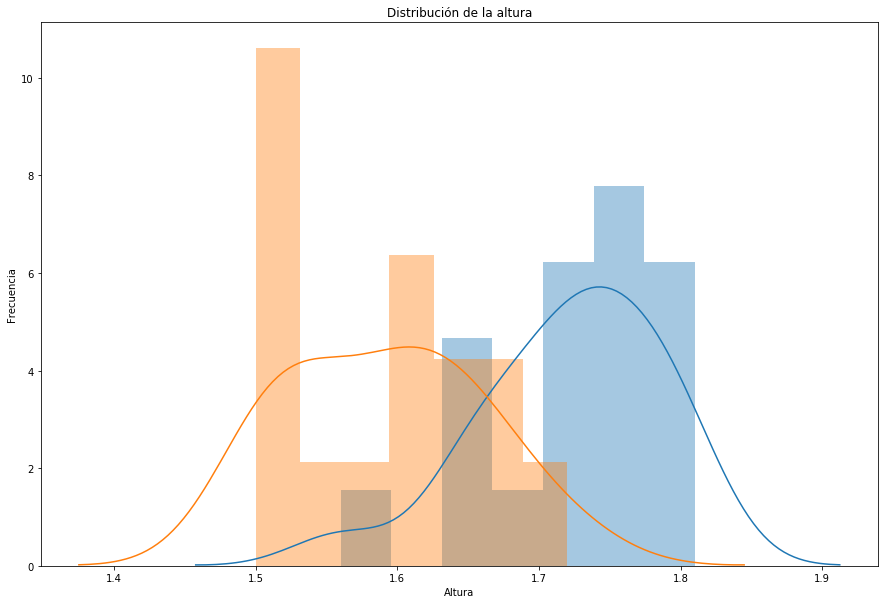

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
altura_h=[]
plt.rcParams["figure.figsize"]=15,10
mycursor2.execute("SELECT value FROM Mediciones WHERE type='Altura' and person_id in(select person_id from Person where sex='H')")
for x in mycursor2:
  altura_h.append(x)
sns.distplot(altura_h,axlabel="Altura",bins=7)


altura_m=[]
mycursor2.execute("SELECT value FROM Mediciones WHERE type='Altura' and person_id in(select person_id from Person where sex='M')")
for x in mycursor2:
  altura_m.append(x)

hplot=sns.distplot(altura_m,axlabel="Altura",bins=7)
hplot.set_ylabel("Frecuencia")
hplot.set_title("Distribución de la altura")

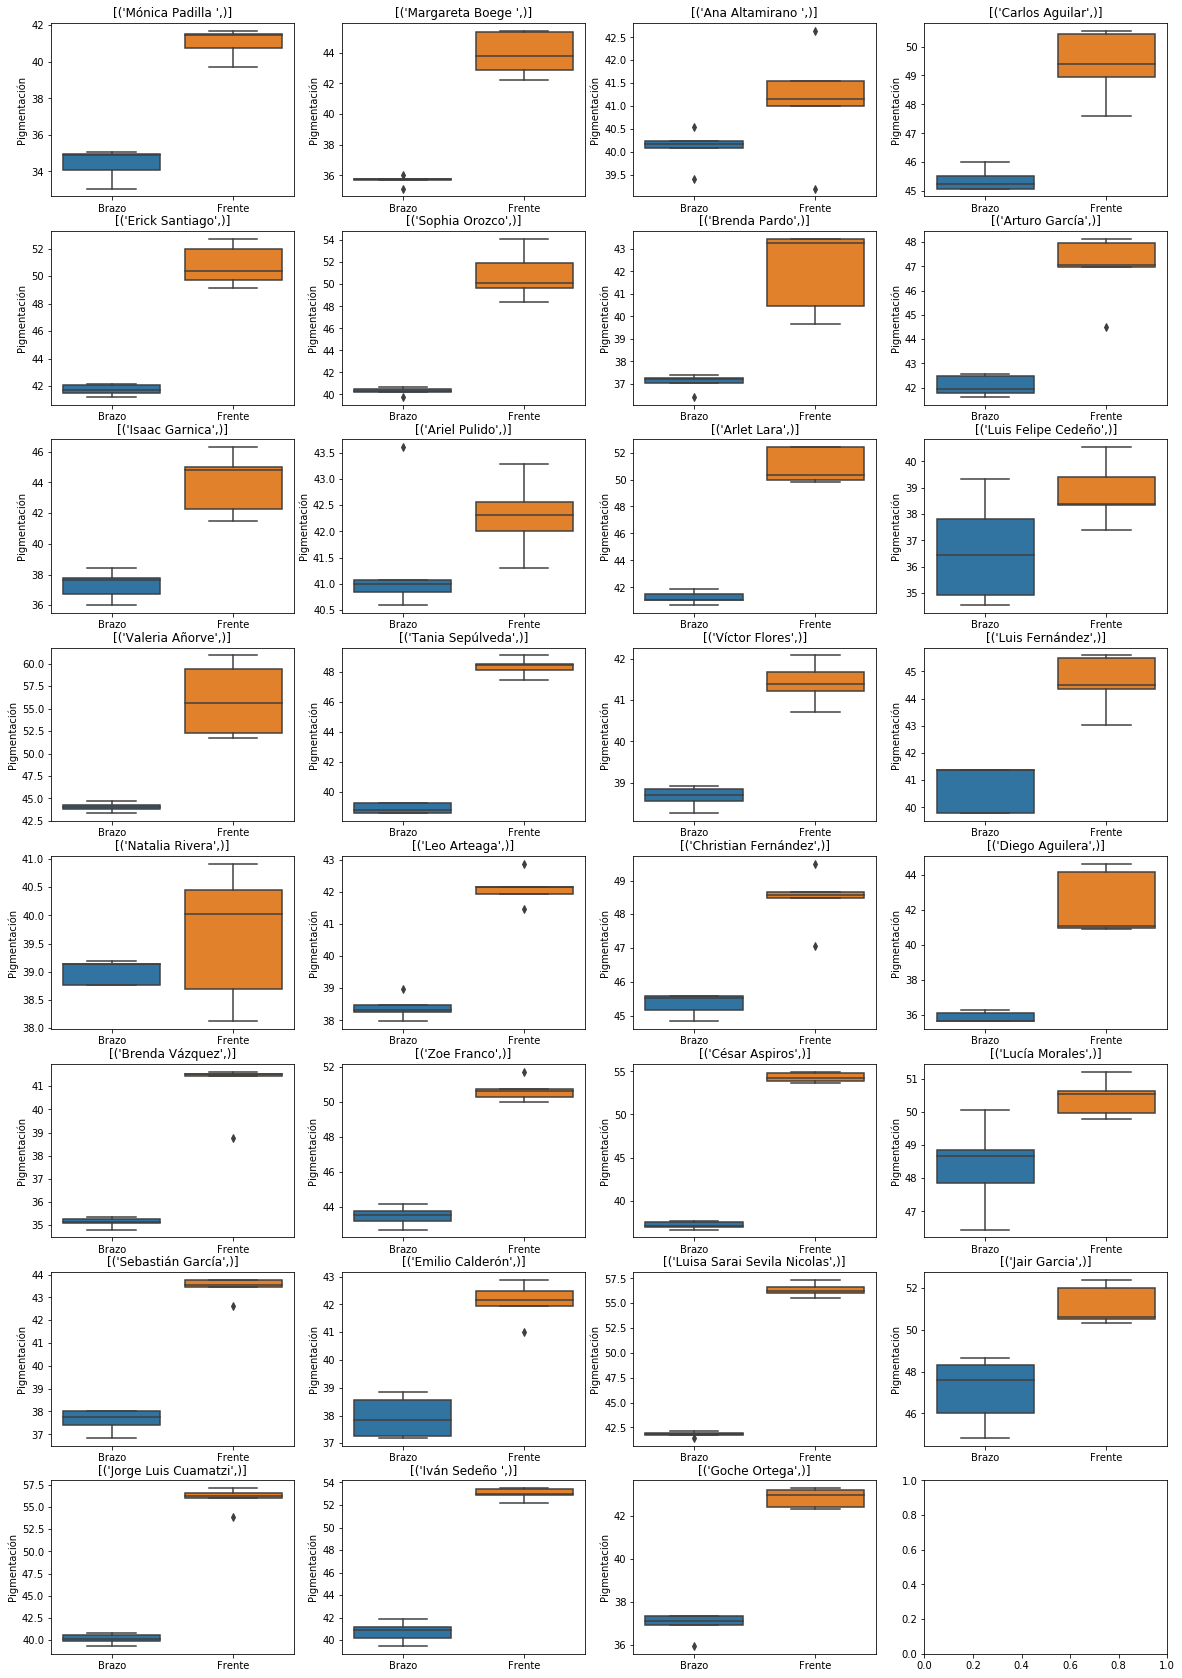

In [16]:
import math
plt.rcParams["figure.figsize"]=20,30
fig, axs = plt.subplots(8,4)
for i in range(1,32):
    sql="SELECT value FROM Mediciones where type='Brazo' and person_id=%s"
    k=(i,)
    mycursor2.execute(sql,k)
    brazo=mycursor2.fetchall()
    sql="SELECT value FROM Mediciones where type='Frente' and person_id=%s"
    mycursor2.execute(sql,k)
    frente=mycursor2.fetchall()
    sql="SELECT name FROM Person where person_id=%s"
    mycursor2.execute(sql,k)
    name=mycursor2.fetchall()
    bplot=sns.boxplot(data=(brazo,frente),ax=axs[math.floor((i-1)/4),(i-1)%4])
    bplot.set_title(str(name))
    bplot.set_ylabel("Pigmentación")
    bplot.set_xticklabels(["Brazo","Frente"])
    